# Author Bikramjit Das
Task 4: Task 4: Creating a Decission Tree clasifier and visualizing it graphically

# Importing Required Libraries

In [1]:
import pandas as pd


# Importing the Dataset

In [2]:
df = pd.read_csv("C://Users//Bikramjit Das//Documents//The_Spark_Foundation//Task 4//Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Label encoding the Species column to convert categorical variables into numerical format

In [41]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
df['Species']=Le.fit_transform(df['Species'])

In [42]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


# Separating the dependent and independent variables

In [43]:
x= df.iloc[:, :-1].values
y= df.iloc[:, -1].values

In [44]:
x

array([[1.00e+00, 5.10e+00, 3.50e+00, 1.40e+00, 2.00e-01],
       [2.00e+00, 4.90e+00, 3.00e+00, 1.40e+00, 2.00e-01],
       [3.00e+00, 4.70e+00, 3.20e+00, 1.30e+00, 2.00e-01],
       [4.00e+00, 4.60e+00, 3.10e+00, 1.50e+00, 2.00e-01],
       [5.00e+00, 5.00e+00, 3.60e+00, 1.40e+00, 2.00e-01],
       [6.00e+00, 5.40e+00, 3.90e+00, 1.70e+00, 4.00e-01],
       [7.00e+00, 4.60e+00, 3.40e+00, 1.40e+00, 3.00e-01],
       [8.00e+00, 5.00e+00, 3.40e+00, 1.50e+00, 2.00e-01],
       [9.00e+00, 4.40e+00, 2.90e+00, 1.40e+00, 2.00e-01],
       [1.00e+01, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01],
       [1.10e+01, 5.40e+00, 3.70e+00, 1.50e+00, 2.00e-01],
       [1.20e+01, 4.80e+00, 3.40e+00, 1.60e+00, 2.00e-01],
       [1.30e+01, 4.80e+00, 3.00e+00, 1.40e+00, 1.00e-01],
       [1.40e+01, 4.30e+00, 3.00e+00, 1.10e+00, 1.00e-01],
       [1.50e+01, 5.80e+00, 4.00e+00, 1.20e+00, 2.00e-01],
       [1.60e+01, 5.70e+00, 4.40e+00, 1.50e+00, 4.00e-01],
       [1.70e+01, 5.40e+00, 3.90e+00, 1.30e+00, 4.00e-01

In [45]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

# Splitting the dataset into training set and test set

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [47]:
x_train

array([[6.20e+01, 5.90e+00, 3.00e+00, 4.20e+00, 1.50e+00],
       [9.30e+01, 5.80e+00, 2.60e+00, 4.00e+00, 1.20e+00],
       [1.13e+02, 6.80e+00, 3.00e+00, 5.50e+00, 2.10e+00],
       [3.00e+00, 4.70e+00, 3.20e+00, 1.30e+00, 2.00e-01],
       [1.42e+02, 6.90e+00, 3.10e+00, 5.10e+00, 2.30e+00],
       [4.40e+01, 5.00e+00, 3.50e+00, 1.60e+00, 6.00e-01],
       [1.10e+01, 5.40e+00, 3.70e+00, 1.50e+00, 2.00e-01],
       [6.10e+01, 5.00e+00, 2.00e+00, 3.50e+00, 1.00e+00],
       [1.17e+02, 6.50e+00, 3.00e+00, 5.50e+00, 1.80e+00],
       [1.45e+02, 6.70e+00, 3.30e+00, 5.70e+00, 2.50e+00],
       [1.20e+02, 6.00e+00, 2.20e+00, 5.00e+00, 1.50e+00],
       [1.09e+02, 6.70e+00, 2.50e+00, 5.80e+00, 1.80e+00],
       [7.00e+01, 5.60e+00, 2.50e+00, 3.90e+00, 1.10e+00],
       [1.36e+02, 7.70e+00, 3.00e+00, 6.10e+00, 2.30e+00],
       [5.70e+01, 6.30e+00, 3.30e+00, 4.70e+00, 1.60e+00],
       [8.10e+01, 5.50e+00, 2.40e+00, 3.80e+00, 1.10e+00],
       [1.24e+02, 6.30e+00, 2.70e+00, 4.90e+00, 1.80e+00

In [48]:
y_train

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0], dtype=int64)

# Training The Decision Tree Classification Model On The Training Set

In [49]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion= 'entropy' ,random_state =0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Predicting The Test Set Results

In [50]:
y_pred=classifier.predict(x_test)

# Predicting The Output , how much accurate answer is given

In [51]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [52]:
print(classifier.predict([[1,5.1,3.5,1.4,0.2]]))

[0]


# Predicting The Output with a new value , how much accurate answer is given

In [53]:
print(classifier.predict([[1.9,5.0,3.3,1.3,0.3]]))

[0]


# From the above prediction we can see it is giving accurate value. As I gave nearby values, the result should come 0 and the result is also coming 0

# Making The Confusion Matrix to get the accuracy score

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[13  0  0]
 [ 0 16  0]
 [ 0  1  8]]


0.9736842105263158

# Visualising The Training Set Result

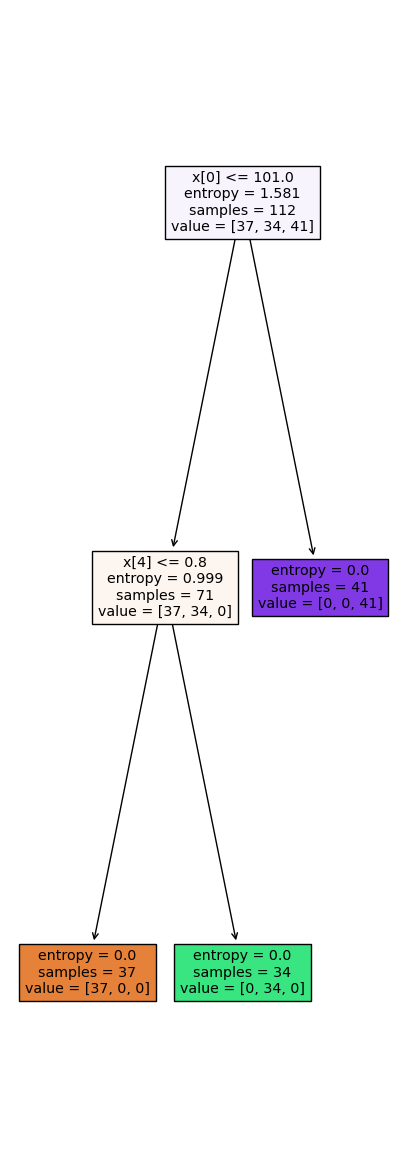

In [55]:
from sklearn import tree
fig = plt.figure(figsize=(5,15))
dt= tree.plot_tree(classifier,filled=True)

# Thank You